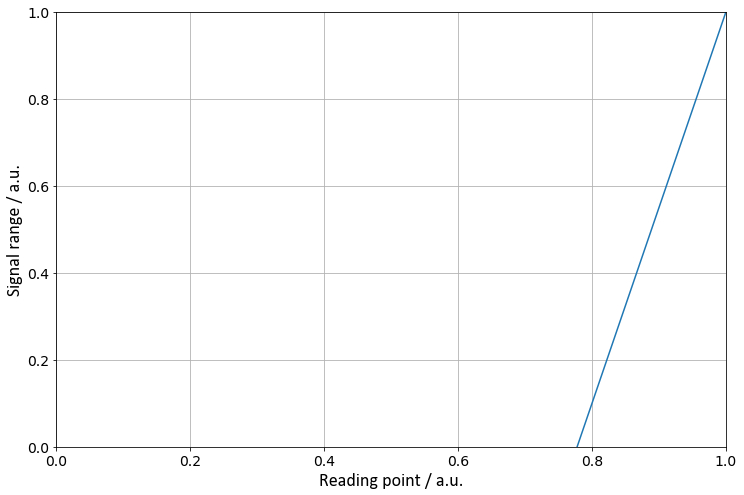

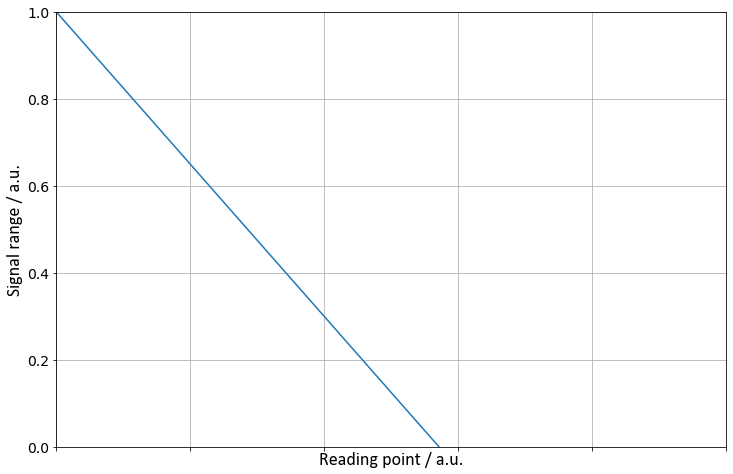

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0,10,100)
y = 4.5*x - 3.5

calibri = {'fontname':'Calibri'}
plt.figure(figsize = (12, 8))
plt.grid()
plt.plot(x, y)
plt.xlabel('Reading point / a.u.', **calibri, fontsize = 18)
plt.ylabel('Signal range / a.u.', **calibri, fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.margins(x=0, y=0)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


x = np.linspace(0,10,100)
y = -1.75*x + 1

calibri = {'fontname':'Calibri'}
plt.figure(figsize = (12, 8))
plt.grid()
plt.plot(x, y)
plt.xlabel('Reading point / a.u.', **calibri, fontsize = 18)
plt.ylabel('Signal range / a.u.', **calibri, fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.margins(x=0, y=0)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tick_params(axis='x', labelbottom=False)
plt.show()

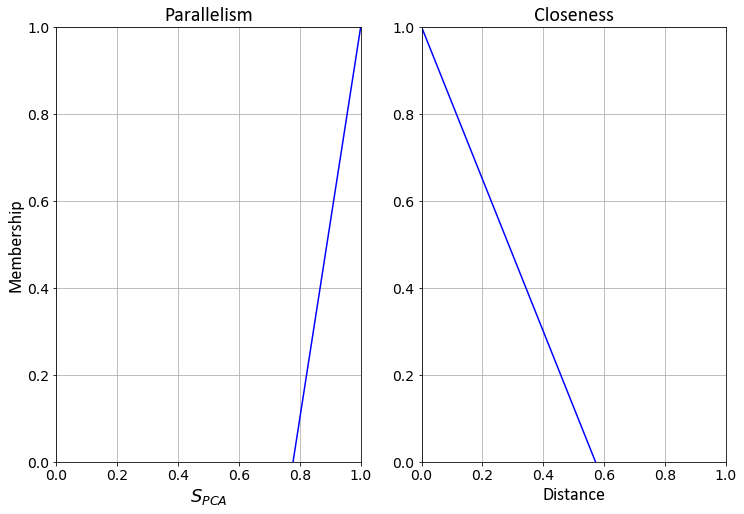

In [5]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0,10,100)
y = 4.5*x - 3.5

calibri = {'fontname':'Calibri'}
plt.figure(figsize = (12, 8))
plt.subplot(121)
plt.grid()
plt.plot(x, y, color="blue")
plt.title("Parallelism", **calibri, fontsize = 20)
plt.xlabel(r'$S_{PCA}$', **calibri, fontsize = 18)
plt.ylabel('Membership', **calibri, fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.margins(x=0, y=0)
plt.xlim([0, 1])
plt.ylim([0, 1])


x = np.linspace(0,10,100)
y = -1.75*x + 1

plt.subplot(122)
plt.grid()
plt.plot(x, y, color="blue")
plt.title("Closeness", **calibri, fontsize = 20)
plt.xlabel('Distance', **calibri, fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.margins(x=0, y=0)
plt.xlim([0, 1])
plt.ylim([0, 1])
# plt.tick_params(axis='x', labelbottom=False)
plt.savefig("parallelism_closeness.svg", bbox_inches="tight")
plt.show()

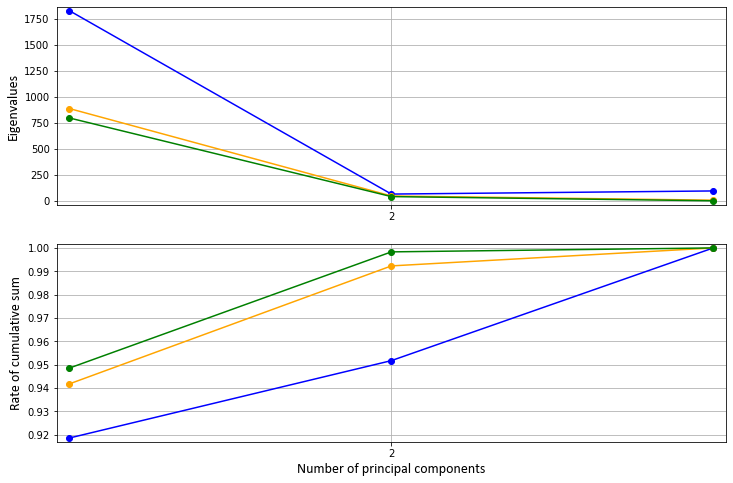

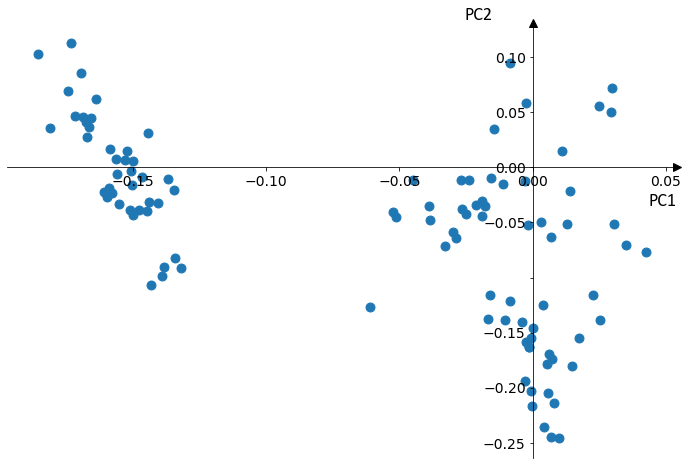

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


tot = np.loadtxt('outfile2.txt', dtype = int)

data = np.asarray(tot)
ncov = 3
dumm = np.round(np.linspace(0, len(data[:][0]) - 1, ncov + 1)).astype(int)

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))
ax1.grid()
ax2.grid()

col = ["blue", "orange", "green"]

for i in range(0, ncov):
    # Compute covariance matrix
    cov = np.cov(data[:, dumm[i]:dumm[i + 1]])
    # Compute eigenvectors from square covariance matrix
    (eigvals, eigvecs) = np.linalg.eig(cov)
    # Return diagonals of eigenmatrix
    diag = -1 * np.diag(eigvals)
#   # Sort diagonals
    diag_sorted = -1 * np.sort(diag)
    diag_sorted = np.ravel(diag_sorted.sum(axis=1))
#   # Plot data
    ax1.plot(diag_sorted, marker="o", color=col[i])
    ax2.plot(np.cumsum(diag_sorted)/np.sum(diag_sorted), marker="o", color=col[i])


plt.xlabel('Number of principal components', **calibri, fontsize=14)
ax1.set_ylabel('Eigenvalues', **calibri, fontsize=14)
ax2.set_ylabel('Rate of cumulative sum', **calibri, fontsize=14)
plt.setp([ax1, ax2], xticks=np.arange(1, len(data), 2), xticklabels=np.arange(2, len(data) + 1, 2))
ax1.margins(x=0.02, y=0.02)
ax2.margins(x=0.02, y=0.02)

plt.savefig("test_signal_2_principal_components.svg", bbox_inches="tight")
plt.show()


pca = PCA(n_components=2)
pca.fit(tot)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
yticks = ax.yaxis.get_major_ticks() 
yticks[4].label1.set_visible(False)
ax.plot((1), (0), ls="", marker=">", ms=8, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=8, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
plt.xlabel('PC1', loc='right', **calibri, fontsize=18)
plt.ylabel('PC2', loc='top', labelpad=-10, **calibri, fontsize=18, rotation=0)
plt.scatter(pca.components_[0], pca.components_[1], s=80)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.savefig("test_signal_2_PCA_reduction.svg", bbox_inches="tight")
plt.show()